# Descriptive Analysis of User Data from Medical Image Labeling Mobile Application

## Analysis Objective: 
Compile a descriptive analysis supporting the robustness of the crowdsourced opinion. Justify downsizing the amount of experts needed to develop a labeled medical image database for artifical intelligance to train on. 
### Dataset Background

•User interaction data was extracted from mobile application where tasked to label whether a medical image appears normal or abnormal. 

•Two user categories were differentiated:
1. Crowd, anyone who downloaded and interacted with the application
2. Medical experts hired to interact with the application



# Data Prep and Cleaning

### Import datasets

In [1]:
import pandas as pd
import numpy as np
results = pd.read_csv('1345_customer_results.csv') #medical case results

### Inspect Customer Results

In [2]:
results.dtypes
results = results.set_index('Case ID')

In [3]:
results = results.dropna(subset=['Origin']) 
results["Expert: Abnormal Votes"] = results["Origin"].str.extract(r'vote(\d)').astype(float)
results = results.drop(['Origin Created At','Origin','Content ID','URL'],axis=1)

Identifying data filtered for security purposes

In [4]:
results.head(2)

,Labeling State,Series,Series Index,Patch,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Internal Notes,Comments,Explanation,Expert: Abnormal Votes
Case ID,,,,,,,,,,,,,,,,,,,
5888087,Gold Standard,NaN,NaN,NaN,2,'no','no',0.0,1.0,'no',2,1.54,'yes',0,0.0,NaN,[],NaN,2.0
5888088,Gold Standard,NaN,NaN,NaN,3,'no','no',0.0,1.0,'no',3,2.34,'yes',0,0.0,NaN,[],NaN,0.0


Any rows that did not have a string associated with expert votes in the URL were dropped (i.e. NA)

In [5]:
results = results.dropna(subset=["Expert: Abnormal Votes"])

In [6]:
results.loc[results['Series'].notna()| results['Series Index'].notna() | results['Patch'].notna() | results['Internal Notes'].notna() | results['Explanation'].notna()]

,Labeling State,Series,Series Index,Patch,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Internal Notes,Comments,Explanation,Expert: Abnormal Votes
Case ID,,,,,,,,,,,,,,,,,,,


**Inspect NaN Columns for Content**: Dataframe is empty; columns inspected will be dropped


In [7]:
results = results.drop(['Series','Series Index','Patch','Internal Notes','Explanation'],axis=1)

In [8]:
results[results['Comments'] != '[]']


,Labeling State,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Comments,Expert: Abnormal Votes
Case ID,,,,,,,,,,,,,,
5892332,Gold Standard,1,'no','no',0.000,1.000,'no',1,0.80,'yes',0,0.00,['There was rapid and spiky rates so why am I ...,3.0
5894116,Gold Standard,5,'no','yes',1.000,1.000,'yes',5,4.00,'no',0,0.00,['Can someone explain why the answer is “no”?'],0.0
5896433,Gold Standard,3,'yes','no',1.000,1.000,'no',3,2.32,'yes',0,0.00,['??'],5.0
5899520,Gold Standard,2,'yes','no',1.000,1.000,'no',2,1.58,'yes',0,0.00,"[""i can't see any spike in this question so wh...",5.0
5900998,Gold Standard,2,'no','yes',1.000,1.000,'yes',2,1.56,'no',0,0.00,['There is obviously a peak happened in there'],3.0
5901914,Gold Standard,6,'yes','no',1.000,1.000,'no',6,4.72,'yes',0,0.00,['No spike present'],5.0
5902040,Gold Standard,2,'no','yes',1.000,1.000,'yes',2,1.58,'no',0,0.00,['How?'],3.0
5904120,Gold Standard,1,'yes','no',1.000,1.000,'no',1,0.78,'yes',0,0.00,['How? '],6.0
5904413,Gold Standard,3,'yes','no',1.000,1.000,'no',3,2.46,'yes',0,0.00,['Multiple?'],6.0


**Inspect Comments for Relevance**: None of the comments seem relevant; comments column will be dropped

In [9]:
results = results.drop(['Comments'],axis=1)

**There should only be 8 experts total**: drop cases for expert count greater than 8

In [10]:
results = results[results["Expert: Abnormal Votes"] <= 8]

In [11]:
results = results.drop(['First Choice Answer','First Choice Votes','First Choice Weight','Second Choice Answer','Second Choice Votes','Second Choice Weight'], axis=1)

**Drop other columns not used for descriptive analysis**: Nth Choice Answer; Nth Choice Votes; Nth Choice Weight

### Important columns for analysis
Each row corresponds to a medical case 

**Identifiers:** 

Case ID: unique identifier will serve as index

Labeling State: identifies whether a expert consensus has been achieved (yes=Gold Standard, no= In Progress)

URL: Extracted out expert vote count within the URL 

**Reads and Annotations**

Qualified Reads: total crowd vote count

Expert: Abnormal Votes: number of experts who thought the case was abnormal

(note, the total of experts voting is always 8)

Correct Label: overall expert consensus 

{yes=case is abnormal, no=case is normal, NaN=no consensus}

Majority Label: overall crowd consensus on each case

**Measures of Confidence**

Difficulty: Qualified Reads *without the Correct Label* divided by total Qualified Reads.

Agreement: Qualified Reads *with the Majority Label* divided by total Qualified Reads.

        
        



### Add Additional Relevant Columns and Optimize Dataframe




In [12]:
bins=[0,0.2,0.4,0.6,0.8,1]
labels=['very easy','easy','moderate','challenging','very challenging']
results['Difficulty Category'] = pd.cut(results['Difficulty'],bins=bins,labels=labels,include_lowest=True)

#### Difficulty Category: 
Clustered cases categorically based on difficulty scores calculated from crowd performance

#### Expert: Normal Votes:
Subtracted the number of total experts by the known number of experts who voted the case as abnormal

#### Expert Agreement: 
Divided the number of experts who voted the case as abnormal by the total number of experts; result is the porportion of experts who agree that the case is abnormal.

#### Error Rate: 
Extracted the indexes for each category and calculated the "error rate" for the experts; result is the porportion of experts who did not vote for the expert majority

#### Consensus:
Indiciated cases where there was unanimity between experts and crowd.

### I will rename some of the original columns for clarity

   #### {Original column --> Renamed Column}
    
    Correct Label --> Expert Majority

    Majority Label --> Crowd Majority

    Difficulty --> Expert/Crowd Disagreement

    Agreement --> Crowd Agreement

In [13]:
df = results
df["Expert Majority"] = results["Correct Label"]
df["Crowd Majority"] = results["Majority Label"]
df["Expert/Crowd Disagreement"] = results["Difficulty"] 
df["Crowd Agreement"] = results["Agreement"] 
df = df.drop(columns= ["Correct Label","Majority Label","Difficulty","Agreement"])

In [14]:
expert_count = 8
df["Expert: Normal Votes"] = (expert_count - results["Expert: Abnormal Votes"])
df["Expert Agreement"] = df["Expert: Abnormal Votes"]/expert_count
df['Consensus'] = np.where(df['Expert Majority'] == df['Crowd Majority'],'yes','no')

In [15]:
EM_yes = df.index[df['Expert Majority'] == "'yes'"].tolist()

EM_no = df.index[df['Expert Majority'] == "'no'"].tolist()

df.loc[EM_yes,"Error Rate"]= df['Expert: Normal Votes'][EM_yes]/expert_count
df.loc[EM_no,"Error Rate"]= df['Expert: Abnormal Votes'][EM_no]/expert_count


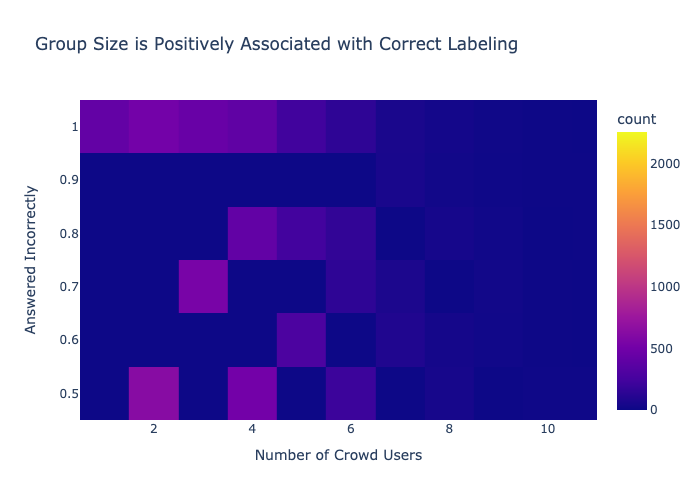

In [22]:

import plotly.express as px
import plotly.io as pio
#%pip install -U kaleido
pio.renderers
fig = px.density_heatmap(df, x="Qualified Reads", y='Expert/Crowd Disagreement', title='Group Size is Positively Associated with Correct Labeling')
fig.update_layout(xaxis_range=[0.5,11])
fig.update_layout(yaxis_range=[0.45,1.05])
fig.update_layout(yaxis_title='Answered Incorrectly')
fig.update_layout(xaxis_title='Number of Crowd Users')
fig.show(renderer="png")


When group size is larger, seen with the uniform dark blue color transition, the frequency of half the group or more answering incorrectly is nearly zero. **The number of qualified reads will be truncated to 5 or more per case to improve crowd accuracy.**

In [17]:
filt_df = df[df['Qualified Reads'] >= 5]
filt_df

,Labeling State,Qualified Reads,Expert: Abnormal Votes,Difficulty Category,Expert Majority,Crowd Majority,Expert/Crowd Disagreement,Crowd Agreement,Expert: Normal Votes,Expert Agreement,Consensus,Error Rate
Case ID,,,,,,,,,,,,
5888091,In Progress,7,4.0,NaN,NaN,'yes',NaN,0.571,4.0,0.500,no,NaN
5888093,Gold Standard,6,0.0,very easy,'no','no',0.000,1.000,8.0,0.000,yes,0.000
5888099,Gold Standard,5,0.0,very easy,'no','no',0.000,1.000,8.0,0.000,yes,0.000
5888100,Gold Standard,7,0.0,very easy,'no','no',0.143,0.857,8.0,0.000,yes,0.000
5888102,Gold Standard,6,0.0,very easy,'no','no',0.000,1.000,8.0,0.000,yes,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
5918367,Gold Standard,5,3.0,very challenging,'no','yes',1.000,1.000,5.0,0.375,no,0.375
5918368,Gold Standard,8,5.0,very easy,'yes','yes',0.000,1.000,3.0,0.625,yes,0.375
5918372,Gold Standard,7,6.0,very easy,'yes','yes',0.000,1.000,2.0,0.750,yes,0.250


# Exploratory Analysis 

In [18]:
#%pip install jupyter-dash
import plotly.io as pio
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [19]:

index = filt_df.index[filt_df['Crowd Majority']=="'no'"].tolist()
filt_df['Crowd Agreement'][index] -= 0.5
filt_df

,Labeling State,Qualified Reads,Expert: Abnormal Votes,Difficulty Category,Expert Majority,Crowd Majority,Expert/Crowd Disagreement,Crowd Agreement,Expert: Normal Votes,Expert Agreement,Consensus,Error Rate
Case ID,,,,,,,,,,,,
5888091,In Progress,7,4.0,NaN,NaN,'yes',NaN,0.571,4.0,0.500,no,NaN
5888093,Gold Standard,6,0.0,very easy,'no','no',0.000,0.500,8.0,0.000,yes,0.000
5888099,Gold Standard,5,0.0,very easy,'no','no',0.000,0.500,8.0,0.000,yes,0.000
5888100,Gold Standard,7,0.0,very easy,'no','no',0.143,0.357,8.0,0.000,yes,0.000
5888102,Gold Standard,6,0.0,very easy,'no','no',0.000,0.500,8.0,0.000,yes,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
5918367,Gold Standard,5,3.0,very challenging,'no','yes',1.000,1.000,5.0,0.375,no,0.375
5918368,Gold Standard,8,5.0,very easy,'yes','yes',0.000,1.000,3.0,0.625,yes,0.375
5918372,Gold Standard,7,6.0,very easy,'yes','yes',0.000,1.000,2.0,0.750,yes,0.250


0.5 was subtracted to match how expert agreement was calculated.

## When experts and crowd disagree, what's the extent of their division?

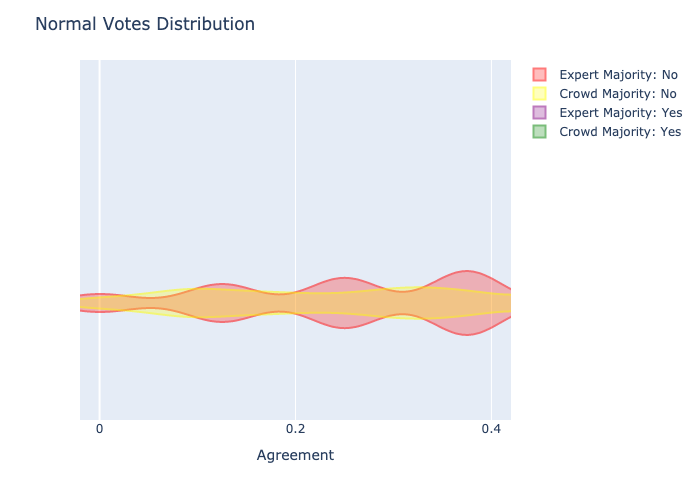

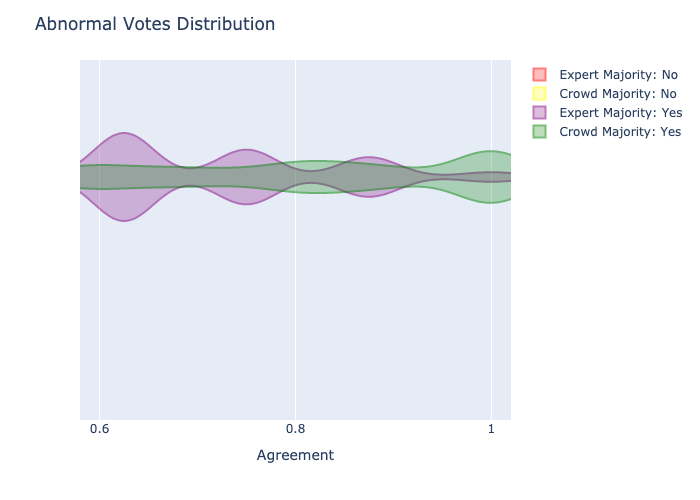

5.770135017129039
0.9202660038960166


In [21]:
consensus_no = filt_df.index[filt_df['Consensus']=='no'].tolist()


fig2 = px.violin(filt_df.loc[consensus_no], 
                    x='Expert Agreement',color='Expert Majority',
                    color_discrete_map={"'yes'":'purple',"'no'":'red'}, 
                    labels={'x' : 'Agreement Ratio', 'y' : 'Count'}
                   )
fig1 = px.violin(filt_df.loc[consensus_no], 
                    x='Crowd Agreement',color='Crowd Majority',
                    color_discrete_map={"'yes'":'green',"'no'":'yellow'})

fig2.update_xaxes(dtick=0.2)
fig2.update_traces(opacity=0.52)
fig1.update_traces(opacity=0.52)
fig1.data[0].name="Crowd Majority: Yes"
fig2.data[0].name="Expert Majority: No"
fig1.data[1].name="Crowd Majority: No"
fig2.data[1].name="Expert Majority: Yes"
                  
fig2.add_trace(fig1.data[0])
fig2.add_trace(fig1.data[1])

fig2.update_layout(title_text='Normal Votes Distribution',
    showlegend=True,
    legend_title=None)
fig2.update_xaxes(range=[-0.02,0.42])
fig2.update_layout(xaxis_title='Agreement')
fig2.show(renderer="png")
fig2_copy = fig2
fig2_copy.update_xaxes(range=[0.58,1.02])

fig2.update_layout(title_text='Abnormal Votes Distribution',
    showlegend=True,
    legend_title=None)
fig2_copy.show(renderer="png")





print((743+116)/len(filt_df.index)*100)#crowd
print((48+89)/len(filt_df.index)*100) #experts


•Axis range represents the extent of agreement within a group: 0.5 is indecisively split; 1 is full group agreement that the case is abnormal; 0 is full group agreement that the case is normal.

•Density of occurrences is large for the crowd group and very narrow for experts for unanimous agreement that the case is abnormal (when Agreement=1).The difference in density is most significant here.

•Division between experts for determining if the case is frequently split for cases that are either normal or abnormal, more so than crowd. 

•743 cases were confidently labeled by crowd as abnormal (=1) and 116 as normal (=0); 48 cases were confidently labeled by experts as abnormal and 89 cases as normal.

•5.77% of total cases were able to be labeled by the crowd with full confidence. Only 0.92% of total cases were able to be labeled by experts with full confidence


•These observations point to how the crowd agrees more frequently with the overall expert conclusions for each case more so than individual experts agreeing with the expert majority, supporting the claim that crowd aggregate can more accurately choose than individual experts can. **Therefore, the amount of experts needed to train artifical intelligence can be fewer, allowing the company to save costs and resources without compromising accuracy.**